# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

Цель проекта: Построить модель, которая сможет правильно  предсказать коэффициент восстановления золота из золотосодержащей руды и заранее предсказывать, если предприятие будет с убыточными характеристиками

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
from numpy.random import RandomState
from numpy.random import randint
import numpy as np
from scipy import stats as st

from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

import matplotlib.pyplot as plt 
import seaborn as sns 

from IPython.display import Image

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train_data = pd.read_csv('/datasets/gold_recovery_train_new.csv') 
test_data = pd.read_csv('/datasets/gold_recovery_test_new.csv')
full_data = pd.read_csv('/datasets/gold_recovery_full_new.csv') 

In [3]:
print(train_data.info())
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
print(test_data.info())
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
print(full_data.info())
full_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Посмотрим на столбцы, которых нет в тестовой выборке:

In [6]:
set(full_data.columns) - set(test_data.columns)

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Получили 34 пропущенных признака:
1. Параметры продукта (final.output.concentrate_ag, rougher.output.tail_ag)
2. Расчетные характеристики (rougher.calculation.au_pb_ratio)

- отсутствует информация о хвостовых частях
- во всех этапах, кроме повторной очистки отсутствует информация о доле металлов
- у финального этапа и этапа флотации отсутствуют признаки обогащения
- отсутствуют данные о некоторых реагентах на этапе флотации

Проверим, что эффективность обогащения рассчитана правильно.Вычислим её на обучающей выборке для признака rougher.output.recovery и найдем MAE между расчётами и значением признака. 

Напишем для этого функцию recovery(C, F, T), в которой:

- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

In [7]:
def recovery(C, F, T):
    return C*(F-T)/(F*(C-T))*100

In [8]:
train_data['counted_recovery'] = recovery(train_data['rougher.output.concentrate_au'], 
                                          train_data['rougher.input.feed_au'],
                                          train_data['rougher.output.tail_au'])
train_data['counted_recovery'].describe()

count    14149.000000
mean        82.704502
std         14.479156
min         -0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
Name: counted_recovery, dtype: float64

In [9]:
train_data_mae = train_data[['rougher.output.recovery','counted_recovery']].dropna()

In [10]:
def mae(recovery, counted_recovery):
    mae = 1 / len(recovery) * (abs(recovery - counted_recovery)).sum() 
    return mae

In [11]:
mae(train_data_mae['rougher.output.recovery'], train_data_mae['counted_recovery'])

9.73512347450521e-15

Имеем значение метрики в порядке е-15. Получившийся результат говорит о том, что расчитанные данные и данные в таблице по recovery равны и рассчитаны верно.

In [12]:
train_data.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
counted_recovery                                0
Length: 88, dtype: int64

In [13]:
test_data.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [14]:
full_data.isna().sum()

date                                            0
final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 87, dtype: int64

 Процент пропусков в признаках:

In [15]:
def percent_nan(data):
    percent_nan = round((data.isnull().sum() * 100/ len(data)),2).sort_values(ascending=False) 
    return percent_nan

In [16]:
percent_nan(train_data)

secondary_cleaner.output.tail_sol           11.34
rougher.state.floatbank10_e_air              3.08
rougher.input.floatbank11_xanthate           3.02
primary_cleaner.output.concentrate_sol       2.02
secondary_cleaner.state.floatbank2_a_air     1.53
                                            ...  
rougher.output.tail_au                       0.00
rougher.state.floatbank10_d_air              0.00
rougher.state.floatbank10_d_level            0.00
rougher.state.floatbank10_e_level            0.00
counted_recovery                             0.00
Length: 88, dtype: float64

In [17]:
percent_nan(test_data)

rougher.input.floatbank11_xanthate            0.47
rougher.input.feed_sol                        0.40
secondary_cleaner.state.floatbank3_a_air      0.17
rougher.input.floatbank11_sulfate             0.15
primary_cleaner.input.depressant              0.09
rougher.input.floatbank10_sulfate             0.09
primary_cleaner.input.xanthate                0.08
primary_cleaner.input.sulfate                 0.08
rougher.input.feed_rate                       0.06
secondary_cleaner.state.floatbank2_a_air      0.06
secondary_cleaner.state.floatbank2_b_air      0.04
rougher.input.feed_size                       0.02
secondary_cleaner.state.floatbank2_b_level    0.00
rougher.state.floatbank10_f_level             0.00
rougher.state.floatbank10_f_air               0.00
secondary_cleaner.state.floatbank3_a_level    0.00
secondary_cleaner.state.floatbank2_a_level    0.00
date                                          0.00
rougher.state.floatbank10_e_air               0.00
secondary_cleaner.state.floatba

In [18]:
percent_nan(full_data)

secondary_cleaner.output.tail_sol           8.99
rougher.input.floatbank11_xanthate          2.33
rougher.state.floatbank10_e_air             2.24
primary_cleaner.output.concentrate_sol      1.90
secondary_cleaner.state.floatbank2_a_air    1.13
                                            ... 
rougher.output.concentrate_pb               0.00
rougher.output.concentrate_au               0.00
rougher.output.recovery                     0.00
rougher.output.tail_pb                      0.00
date                                        0.00
Length: 87, dtype: float64

In [20]:
train_data = train_data.ffill(axis = 0)
train_data.isna().sum().sum()

0

In [21]:
test_data = test_data.ffill(axis = 0)
test_data.isna().sum().sum()

0

In [22]:
full_data = full_data.ffill(axis = 0)
full_data.isna().sum().sum()

0

Приведем столбец date к формату даты:

In [23]:
train_data['date'] = pd.to_datetime(train_data['date'], format='%Y-%m-%d %H:%M:%S')
train_data = train_data.set_index(['date'])

In [25]:
test_data.isna().sum().sum()

0

In [26]:
test_data['date'] = pd.to_datetime(test_data['date'], format='%Y-%m-%d %H:%M:%S')
test_data = test_data.set_index(['date'])

In [28]:
full_data.isna().sum().sum()

0

In [29]:
full_data['date'] = pd.to_datetime(full_data['date'], format='%Y-%m-%d %H:%M:%S')
full_data = full_data.set_index(['date'])

Создадим датафрейм по индексам test_data для того чтобы восстановить недостающие значения rougher.output.recovery и final.output.recovery:

In [30]:
test_full_data = pd.DataFrame(data=full_data, index=test_data.index)
test_full_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         5290 non-null   float64
 1   final.output.concentrate_pb                         5290 non-null   float64
 2   final.output.concentrate_sol                        5290 non-null   float64
 3   final.output.concentrate_au                         5290 non-null   float64
 4   final.output.recovery                               5290 non-null   float64
 5   final.output.tail_ag                                5290 non-null   float64
 6   final.output.tail_pb                                5290 non-null   float64
 7   final.output.tail_sol                               5290 non-null   float64
 8   final.output.tail_au                      

## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. В отдельный датафрейм выведем информацию о концентрации металлов и построим график:

In [31]:
concentrate_data = train_data[['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_au',
                           'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 
                           'final.output.concentrate_ag','rougher.output.concentrate_pb',
                           'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb',
                           'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 
                           'final.output.concentrate_au']]
concentrate_data.head()

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_au,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
date,,,,,,,,,,,,
2016-01-15 00:00:00,6.100378,2.284912,6.486150,11.500771,8.547551,6.055403,7.101074,10.389648,9.889648,19.793808,34.174427,42.192020
2016-01-15 01:00:00,6.161113,2.266033,6.478583,11.615865,8.558743,6.029369,7.278807,10.497069,9.968944,20.050975,34.118526,42.701629
2016-01-15 02:00:00,6.116455,2.159622,6.362222,11.695753,8.603505,6.055926,7.216833,10.354494,10.213995,19.737170,33.969464,42.657501
2016-01-15 03:00:00,6.043309,2.037807,6.118189,11.915047,7.221879,6.047977,7.175616,8.496563,9.977019,19.320810,28.260743,42.689819
2016-01-15 04:00:00,6.060915,1.786875,5.663707,12.411054,9.089428,6.148599,7.240205,9.986786,10.142511,19.216101,33.044932,42.774141


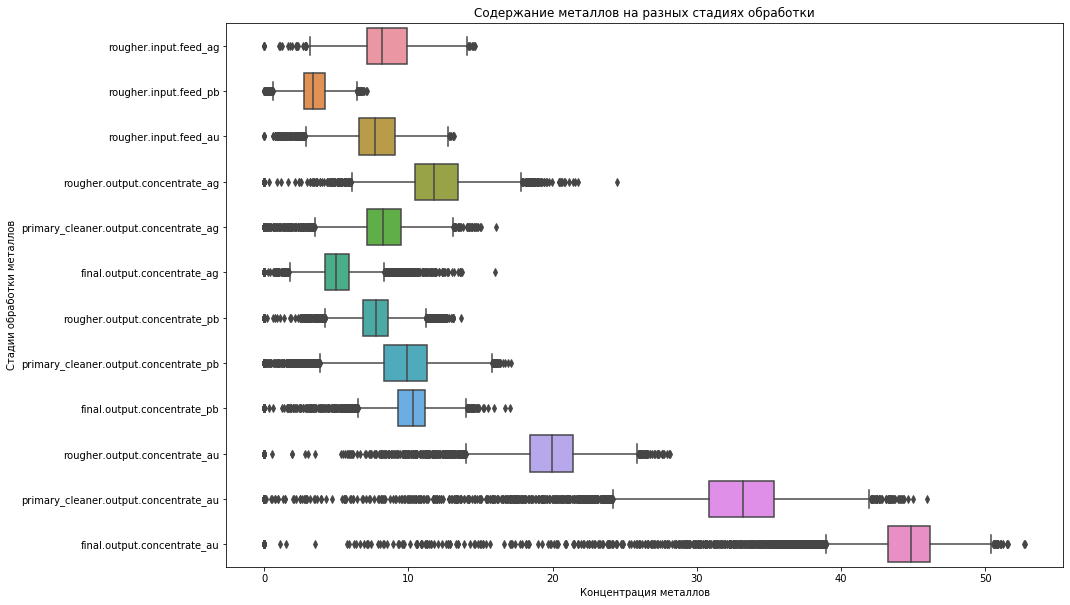

In [32]:
plt.figure(figsize=(15,10))
sns.boxplot(data=concentrate_data, orient='h').set(xlabel='Концентрация металлов',
                                                 ylabel='Стадии обработки металлов', 
                                                 title='Содержание металлов на разных стадиях обработки');

По графику видно, что с каждым этапом увеличивается концентрация золата и свинца, так же можно заметить уменьшение концентрации серебра.

Теперь сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения будут сильно отличаться друг от друга, оценка модели будет неправильной.

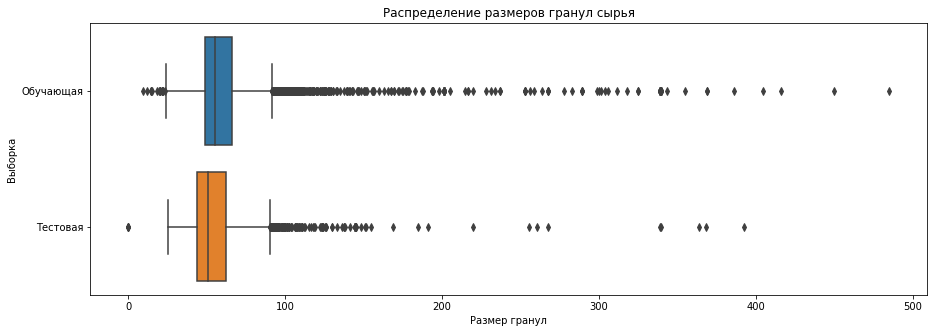

In [33]:
plt.figure(figsize=(15,5))
sns.boxplot(data=(train_data['rougher.input.feed_size'], 
                  test_data['rougher.input.feed_size']), orient='h').set(xlabel='Размер гранул',
                                                                         ylabel='Выборка', 
                                                                         title='Распределение размеров гранул сырья');
plt.yticks([0,1], ['Обучающая', 'Тестовая']);

Посмотрим на распределение плоности для двух выборок:

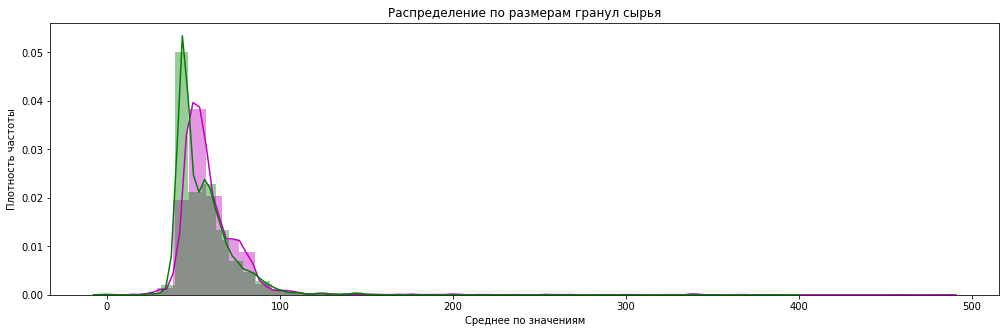

In [34]:
plt.figure(figsize=(17,5))
sns.distplot(train_data['rougher.input.feed_size'], color='m').set(xlabel='Среднее по значениям',
                                                                   ylabel='Плотность частоты',
                                                                   title='Распределение по размерам гранул сырья');
sns.distplot(test_data['rougher.input.feed_size'], color='g').set(xlabel='Среднее по значениям',
                                          ylabel='Плотность частоты');

По построенным графикам можем сделать вывод, что размеры гранул сырья на обучающей и тестовой выборках не сильно отличаются друг от друга, что не окажет существенного влияния на построение модели.

In [35]:
print( 'Средний размер частиц для train равен', round(train_data['rougher.input.feed_size'].mean(),2))
print( 'Средний размер частиц для test равен', round(test_data['rougher.input.feed_size'].mean(),2))

Средний размер частиц для train равен 60.24
Средний размер частиц для test равен 55.95


Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. В отдельный датафрейм выведем информацию о концентрации металлов на разных стадиях

In [36]:
sum_concentrate_data = train_data[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 
                                   'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag',
                                   'rougher.input.feed_pb', 'rougher.output.concentrate_pb', 
                                   'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb',
                                   'rougher.input.feed_au', 'rougher.output.concentrate_au', 
                                   'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au',
                                   'rougher.input.feed_sol', 'rougher.output.concentrate_sol',
                                   'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_sol']]
sum_concentrate_data.head()

,rougher.input.feed_ag,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag,rougher.input.feed_pb,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb,rougher.input.feed_au,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au,rougher.input.feed_sol,rougher.output.concentrate_sol,primary_cleaner.output.concentrate_sol,final.output.concentrate_sol
date,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.100378,11.500771,8.547551,6.055403,2.284912,7.101074,10.389648,9.889648,6.486150,19.793808,34.174427,42.192020,36.808594,28.029297,19.529297,5.507324
2016-01-15 01:00:00,6.161113,11.615865,8.558743,6.029369,2.266033,7.278807,10.497069,9.968944,6.478583,20.050975,34.118526,42.701629,35.753385,28.067063,19.369147,5.257781
2016-01-15 02:00:00,6.116455,11.695753,8.603505,6.055926,2.159622,7.216833,10.354494,10.213995,6.362222,19.737170,33.969464,42.657501,35.971630,27.454037,19.167579,5.383759
2016-01-15 03:00:00,6.043309,11.915047,7.221879,6.047977,2.037807,7.175616,8.496563,9.977019,6.118189,19.320810,28.260743,42.689819,36.862241,27.341277,15.978538,4.858634
2016-01-15 04:00:00,6.060915,12.411054,9.089428,6.148599,1.786875,7.240205,9.986786,10.142511,5.663707,19.216101,33.044932,42.774141,34.347666,27.041023,19.199864,4.939416


Концентрация в руде:

In [37]:
sum_data_input_feed = sum_concentrate_data.iloc[:, 0::4]
sum_data_input_feed.head()

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_au,rougher.input.feed_sol
date,,,,
2016-01-15 00:00:00,6.100378,2.284912,6.486150,36.808594
2016-01-15 01:00:00,6.161113,2.266033,6.478583,35.753385
2016-01-15 02:00:00,6.116455,2.159622,6.362222,35.971630
2016-01-15 03:00:00,6.043309,2.037807,6.118189,36.862241
2016-01-15 04:00:00,6.060915,1.786875,5.663707,34.347666


Добавим столбец с суммарной концентрацией:

In [38]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [39]:
sum_data_input_feed['sum'] = sum_data_input_feed.sum(axis=1)
sum_data_input_feed.head()

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_au,rougher.input.feed_sol,sum
date,,,,,
2016-01-15 00:00:00,6.100378,2.284912,6.486150,36.808594,51.680034
2016-01-15 01:00:00,6.161113,2.266033,6.478583,35.753385,50.659114
2016-01-15 02:00:00,6.116455,2.159622,6.362222,35.971630,50.609929
2016-01-15 03:00:00,6.043309,2.037807,6.118189,36.862241,51.061546
2016-01-15 04:00:00,6.060915,1.786875,5.663707,34.347666,47.859163


Теперь сделаем то же самое для чернового

In [40]:
sum_data_rougher = sum_concentrate_data.iloc[:, 1::4]
sum_data_rougher['sum'] = sum_data_rougher.sum(axis=1)
sum_data_rougher.head()

,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_au,rougher.output.concentrate_sol,sum
date,,,,,
2016-01-15 00:00:00,11.500771,7.101074,19.793808,28.029297,66.424950
2016-01-15 01:00:00,11.615865,7.278807,20.050975,28.067063,67.012710
2016-01-15 02:00:00,11.695753,7.216833,19.737170,27.454037,66.103793
2016-01-15 03:00:00,11.915047,7.175616,19.320810,27.341277,65.752751
2016-01-15 04:00:00,12.411054,7.240205,19.216101,27.041023,65.908382


После первой очистки:

In [41]:
sum_data_primary_cleaner = sum_concentrate_data.iloc[:, 2::4]
sum_data_primary_cleaner['sum'] = sum_data_primary_cleaner.sum(axis=1)
sum_data_primary_cleaner.head()

,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_sol,sum
date,,,,,
2016-01-15 00:00:00,8.547551,10.389648,34.174427,19.529297,72.640924
2016-01-15 01:00:00,8.558743,10.497069,34.118526,19.369147,72.543485
2016-01-15 02:00:00,8.603505,10.354494,33.969464,19.167579,72.095042
2016-01-15 03:00:00,7.221879,8.496563,28.260743,15.978538,59.957723
2016-01-15 04:00:00,9.089428,9.986786,33.044932,19.199864,71.321010


Финальный концентрат:

In [42]:
sum_data_final = sum_concentrate_data.iloc[:, 3::4]
sum_data_final['sum'] = sum_data_final.sum(axis=1)
sum_data_final.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_au,final.output.concentrate_sol,sum
date,,,,,
2016-01-15 00:00:00,6.055403,9.889648,42.192020,5.507324,63.644396
2016-01-15 01:00:00,6.029369,9.968944,42.701629,5.257781,63.957723
2016-01-15 02:00:00,6.055926,10.213995,42.657501,5.383759,64.311180
2016-01-15 03:00:00,6.047977,9.977019,42.689819,4.858634,63.573449
2016-01-15 04:00:00,6.148599,10.142511,42.774141,4.939416,64.004667


Посмотрим на распределения по этапам обработки, построим график boxplot

([<matplotlib.axis.YTick at 0x7f55cf332d10>,
 <a list of 4 Text yticklabel objects>)

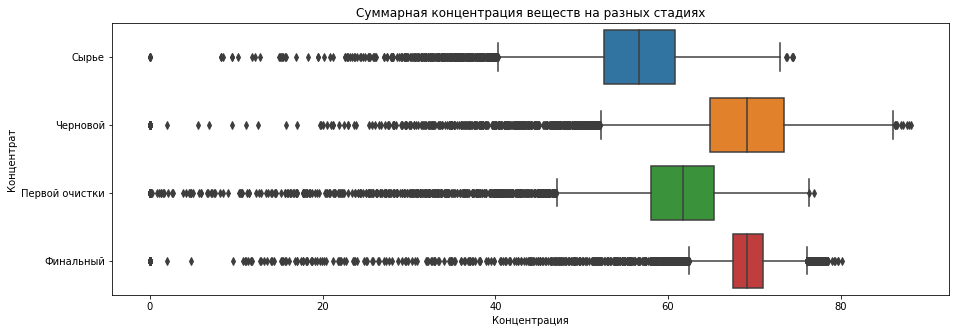

In [43]:
plt.figure(figsize=(15,5))
sns.boxplot(data=(sum_data_input_feed['sum'], 
                  sum_data_rougher['sum'], 
                  sum_data_primary_cleaner['sum'], 
                  sum_data_final['sum']), orient='h').set(xlabel='Концентрация', 
                                                          ylabel='Концентрат',
                                                          title='Суммарная концентрация веществ на разных стадиях')
plt.yticks([0,1,2,3], ['Сырье', 'Черновой', 'Первой очистки', 'Финальный'])

На каждом этапе есть аномальные значения 0. Сравним количество нулей в концентрации и суммарной концетрации золота на каждом этапе

In [44]:
len(sum_data_input_feed[sum_data_input_feed['sum'] == 0]) == len(sum_data_input_feed[sum_data_input_feed['rougher.input.feed_au'] == 0])

True

In [45]:
len(sum_data_rougher[sum_data_rougher['sum'] == 0]) == len(sum_data_rougher[sum_data_rougher['rougher.output.concentrate_au'] == 0])

True

In [46]:
len(sum_data_primary_cleaner[sum_data_primary_cleaner['sum'] == 0]) == len(sum_data_primary_cleaner[sum_data_primary_cleaner['primary_cleaner.output.concentrate_au'] == 0])

True

In [47]:
len(sum_data_final[sum_data_final['sum'] == 0]) == len(sum_data_final[sum_data_final['final.output.concentrate_au'] == 0])

True

Удалим нули:

In [48]:
train_data= train_data[(train_data['rougher.input.feed_au'] !=0) & 
         (train_data['rougher.output.concentrate_au'] !=0) &
         (train_data['primary_cleaner.output.concentrate_au'] !=0) &
         (train_data['final.output.concentrate_au'] != 0)]
train_data.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,counted_recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794


Разметим обучающие признаки и целевые признаки rougher.output.recovery и final.output.recovery

In [49]:
test_columns =  set(test_data.columns)
data_train_features = train_data.loc[:, test_columns]
data_train_features.head()

,secondary_cleaner.state.floatbank3_a_level,primary_cleaner.state.floatbank8_d_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_c_air,primary_cleaner.input.feed_size,rougher.input.floatbank11_sulfate,rougher.input.feed_size,rougher.state.floatbank10_f_air,primary_cleaner.input.sulfate,rougher.state.floatbank10_c_level,...,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_c_level,secondary_cleaner.state.floatbank2_b_level,primary_cleaner.input.depressant,rougher.input.floatbank10_sulfate,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_a_level,rougher.input.feed_sol,rougher.state.floatbank10_d_level,primary_cleaner.state.floatbank8_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,-495.262817,1554.367432,-404.066986,1602.375000,7.25,11.836743,55.486599,1416.354980,127.092003,-442.204468,...,1549.775757,-498.666595,-501.406281,10.128295,11.986616,12.099931,-502.488007,36.808594,-451.294128,-498.912140
2016-01-15 01:00:00,-500.085473,1574.479259,-400.065196,1600.479580,7.25,11.996163,57.278666,1399.719514,125.629232,-449.830646,...,1576.166671,-499.315107,-500.372428,10.296251,11.971193,11.950531,-505.503262,35.753385,-449.953649,-500.904965
2016-01-15 02:00:00,-499.442343,1599.541515,-400.074028,1599.672797,7.25,11.920305,57.510649,1400.316682,123.819808,-449.954491,...,1601.556163,-500.870069,-499.951928,11.316280,11.920603,11.912783,-502.520901,35.971630,-449.954185,-499.997791
2016-01-15 03:00:00,-500.008812,1600.449520,-400.200179,1600.012842,7.25,11.692450,57.792734,1400.234743,122.270188,-449.910497,...,1599.968720,-500.727997,-499.848796,11.322140,11.630094,11.999550,-500.857308,36.862241,-450.130127,-500.951778
2016-01-15 04:00:00,-500.083811,1602.649541,-399.752729,1600.357732,7.25,10.960521,56.047189,1401.160227,117.988169,-450.034364,...,1601.339707,-500.888152,-500.593614,11.913613,10.957755,11.953070,-499.838632,34.347666,-449.909799,-498.975456


In [50]:
data_train_target = train_data.loc[:, ['rougher.output.recovery', 'final.output.recovery']]
data_train_target.head()

,rougher.output.recovery,final.output.recovery
date,,
2016-01-15 00:00:00,87.107763,70.541216
2016-01-15 01:00:00,86.843261,69.266198
2016-01-15 02:00:00,86.842308,68.116445
2016-01-15 03:00:00,87.226430,68.347543
2016-01-15 04:00:00,86.688794,66.927016


Разделим features на rougher_features и final_features. Используем метод filter()

In [51]:
data_train_rougher_features = data_train_features.filter(regex='^rougher',axis=1)
data_train_rougher_features.head()

,rougher.state.floatbank10_a_level,rougher.state.floatbank10_c_air,rougher.input.floatbank11_sulfate,rougher.input.feed_size,rougher.state.floatbank10_f_air,rougher.state.floatbank10_c_level,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_b_air,rougher.state.floatbank10_f_level,rougher.state.floatbank10_a_air,...,rougher.state.floatbank10_e_level,rougher.input.feed_ag,rougher.state.floatbank10_e_air,rougher.input.floatbank10_xanthate,rougher.input.feed_pb,rougher.state.floatbank10_b_level,rougher.state.floatbank10_d_air,rougher.input.floatbank10_sulfate,rougher.input.feed_sol,rougher.state.floatbank10_d_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,-404.066986,1602.375000,11.836743,55.486599,1416.354980,-442.204468,6.005818,1603.011353,-451.939636,999.706909,...,-455.462982,6.100378,1404.472046,6.007990,2.284912,-434.715027,1598.937256,11.986616,36.808594,-451.294128
2016-01-15 01:00:00,-400.065196,1600.479580,11.996163,57.278666,1399.719514,-449.830646,6.012594,1600.754587,-450.119001,1000.286398,...,-450.869848,6.161113,1399.227084,6.005766,2.266033,-449.953435,1600.527589,11.971193,35.753385,-449.953649
2016-01-15 02:00:00,-400.074028,1599.672797,11.920305,57.510649,1400.316682,-449.954491,6.204633,1599.337330,-450.527147,999.719565,...,-449.937588,6.116455,1399.180945,6.197377,2.159622,-450.008530,1599.849325,11.920603,35.971630,-449.954185
2016-01-15 03:00:00,-400.200179,1600.012842,11.692450,57.792734,1400.234743,-449.910497,6.196578,1600.059442,-449.790835,999.814770,...,-450.030142,6.043309,1400.943157,6.203177,2.037807,-450.619948,1597.725177,11.630094,36.862241,-450.130127
2016-01-15 04:00:00,-399.752729,1600.357732,10.960521,56.047189,1401.160227,-450.034364,6.194897,1600.208824,-450.407128,999.678690,...,-448.877187,6.060915,1401.560902,6.198826,1.786875,-449.599614,1599.759049,10.957755,34.347666,-449.909799


final_features определяется разницей столбцов df_train_features и df_train_rougher_features

In [52]:
final_columns = set(data_train_features) - set(data_train_rougher_features)
data_train_final_features = data_train_features.loc[:, final_columns]
data_train_final_features.head()

,secondary_cleaner.state.floatbank3_a_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.input.feed_size,primary_cleaner.input.sulfate,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.state.floatbank2_b_air,...,primary_cleaner.state.floatbank8_c_air,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank5_a_level,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_c_level,secondary_cleaner.state.floatbank2_b_level,primary_cleaner.input.depressant,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_a_level,primary_cleaner.state.floatbank8_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,-495.262817,1554.367432,7.25,127.092003,-499.340973,9.925633,8.079666,25.853109,-605.841980,23.893660,...,1549.873901,14.151341,-498.310211,1549.775757,-498.666595,-501.406281,10.128295,12.099931,-502.488007,-498.912140
2016-01-15 01:00:00,-500.085473,1574.479259,7.25,125.629232,-499.446897,10.039245,7.984757,25.880539,-599.787184,23.889530,...,1575.994189,13.998353,-500.169983,1576.166671,-499.315107,-500.372428,10.296251,11.950531,-505.503262,-500.904965
2016-01-15 02:00:00,-499.442343,1599.541515,7.25,123.819808,-499.901982,10.070913,8.013877,26.005245,-601.427363,23.886657,...,1602.003542,14.028663,-500.129135,1601.556163,-500.870069,-499.951928,11.316280,11.912783,-502.520901,-499.997791
2016-01-15 03:00:00,-500.008812,1600.449520,7.25,122.270188,-499.944710,9.970366,7.977324,25.942508,-599.996129,23.955516,...,1600.304144,14.005551,-499.201640,1599.968720,-500.727997,-499.848796,11.322140,11.999550,-500.857308,-500.951778
2016-01-15 04:00:00,-500.083811,1602.649541,7.25,117.988169,-499.990309,9.925709,7.894242,26.024787,-601.496691,23.955345,...,1599.581894,13.996647,-501.686727,1601.339707,-500.888152,-500.593614,11.913613,11.953070,-499.838632,-498.975456


Тоже самое для тестовой выборке df_test:

In [53]:
data_test_rougher_features = test_data.filter(regex='^rougher',axis=1)
data_test_rougher_features.head()

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,...,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,...,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807
2016-09-01 01:59:59,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,...,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514
2016-09-01 02:59:59,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,...,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340
2016-09-01 03:59:59,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,...,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.503052,1001.930679,-400.437573,950.735324,-399.802986
2016-09-01 04:59:59,11.327427,4.767383,488.248117,63.315324,41.269161,11.290425,13.607257,5.738081,13.650053,5.739634,...,1304.658848,-399.511519,1306.455515,-399.050685,1248.699349,-400.876894,1058.839106,-398.988239,949.645313,-399.277632


In [54]:
data_test_final_features = test_data.loc[:, final_columns]
data_test_final_features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   secondary_cleaner.state.floatbank3_a_level  5290 non-null   float64
 1   primary_cleaner.state.floatbank8_d_air      5290 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.sulfate               5290 non-null   float64
 4   secondary_cleaner.state.floatbank3_b_level  5290 non-null   float64
 5   secondary_cleaner.state.floatbank5_a_air    5290 non-null   float64
 6   secondary_cleaner.state.floatbank5_b_air    5290 non-null   float64
 7   secondary_cleaner.state.floatbank2_a_air    5290 non-null   float64
 8   secondary_cleaner.state.floatbank6_a_level  5290 non-null   float64
 9   secondary_cleaner.state.floatbank2_b_air    5290 

Удалим нули из full_data

In [55]:
full_data = full_data[(full_data['rougher.input.feed_au'] !=0) & 
         (full_data['rougher.output.concentrate_au'] !=0) &
         (full_data['primary_cleaner.output.concentrate_au'] !=0) &
         (full_data['final.output.concentrate_au'] != 0)]
full_data.head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [56]:
data_test_full = pd.DataFrame(data=full_data, index=test_data.index)
data_test_full.dropna(inplace=True)
data_test_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5123 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         5123 non-null   float64
 1   final.output.concentrate_pb                         5123 non-null   float64
 2   final.output.concentrate_sol                        5123 non-null   float64
 3   final.output.concentrate_au                         5123 non-null   float64
 4   final.output.recovery                               5123 non-null   float64
 5   final.output.tail_ag                                5123 non-null   float64
 6   final.output.tail_pb                                5123 non-null   float64
 7   final.output.tail_sol                               5123 non-null   float64
 8   final.output.tail_au                      

Назначим целевые признаки в data_test_target

In [57]:
data_test_target = data_test_full.loc[:, ['rougher.output.recovery', 'final.output.recovery']]
data_test_target.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5123 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rougher.output.recovery  5123 non-null   float64
 1   final.output.recovery    5123 non-null   float64
dtypes: float64(2)
memory usage: 120.1 KB


Так как в features и target размеры ДатаФреймов разные из за 0 значений, приведем к одной размерности, используя индексы df_test_full.index

In [58]:
data_test_rougher_features = pd.DataFrame(data=data_test_rougher_features, index=data_test_full.index)
data_test_final_features = pd.DataFrame(data=data_test_final_features, index=data_test_full.index)

In [59]:
data_test_rougher_features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5123 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   rougher.input.feed_ag               5123 non-null   float64
 1   rougher.input.feed_pb               5123 non-null   float64
 2   rougher.input.feed_rate             5123 non-null   float64
 3   rougher.input.feed_size             5123 non-null   float64
 4   rougher.input.feed_sol              5123 non-null   float64
 5   rougher.input.feed_au               5123 non-null   float64
 6   rougher.input.floatbank10_sulfate   5123 non-null   float64
 7   rougher.input.floatbank10_xanthate  5123 non-null   float64
 8   rougher.input.floatbank11_sulfate   5123 non-null   float64
 9   rougher.input.floatbank11_xanthate  5123 non-null   float64
 10  rougher.state.floatbank10_a_air     5123 non-null   float64
 11  rougher

In [60]:
data_test_final_features.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5123 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   secondary_cleaner.state.floatbank3_a_level  5123 non-null   float64
 1   primary_cleaner.state.floatbank8_d_air      5123 non-null   float64
 2   primary_cleaner.input.feed_size             5123 non-null   float64
 3   primary_cleaner.input.sulfate               5123 non-null   float64
 4   secondary_cleaner.state.floatbank3_b_level  5123 non-null   float64
 5   secondary_cleaner.state.floatbank5_a_air    5123 non-null   float64
 6   secondary_cleaner.state.floatbank5_b_air    5123 non-null   float64
 7   secondary_cleaner.state.floatbank2_a_air    5123 non-null   float64
 8   secondary_cleaner.state.floatbank6_a_level  5123 non-null   float64
 9   secondary_cleaner.state.floatbank2_b_air    5123 



- Выяснили, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки: с каждым этапом увеличивается концентрация золата и свинца, так же можно заметить уменьшение концентрации серебра
- Сравнили распределения размеров гранул сырья на обучающей и тестовой выборках. Размеры гранул сырья на обучающей и тестовой выборках не сильно отличаются друг от друга, что не окажет существенного влияния на построение модели
- Исследовали суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. На каждом этапе выявили аномальные значения 0 и исключили эти значения, так как они могли повлиять на обучение модели

## Модель

Напишем функцию для масштабирования признаков

In [61]:
def to_StandardScaler(data):
    sc = StandardScaler()
    data = sc.fit_transform(data)
    return data

In [62]:
data_train_rougher_features = to_StandardScaler(data_train_rougher_features)
data_train_final_features = to_StandardScaler(data_train_rougher_features)

data_test_rougher_features = to_StandardScaler(data_test_rougher_features)
data_test_final_features = to_StandardScaler(data_test_final_features)

Признаки:
- data_train_rougher_features
- data_train_final_features
- data_test_rougher_features
- data_test_final_features

Целевые признаки:
- data_train_target['rougher.output.recovery']
- data_train_target['final.output.recovery']
- data_test_target['rougher.output.recovery']
- data_test_target['final.output.recovery']

Объявим переменные для моделей:

In [63]:
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=12345)
random_forest_model = RandomForestRegressor(random_state=12345)

Для подбора гиперпараметров будем использовать GridSearchCV, для кросс-валидации при подборе гиперпараметров - ShuffleSplit

In [64]:
decision_tree_model.get_params().keys()

dict_keys(['criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

Создадим словарь гиперпараметров для решающего дерева:

In [65]:
parameters_grid = {
    'max_depth' : range(1,6),
    'min_samples_leaf': range(2,6),
    'min_samples_split': range(2,6)}

Стратегия кросс-валидации для подбора параметров:

In [66]:
cv = ShuffleSplit(n_splits=3, test_size=0.2, random_state=0)

Импортируем make_scorer и напишем собственный оценщик sMAPE:

In [67]:
from sklearn.metrics import make_scorer

In [68]:
def sMAPE(predict, target):
    sMAPE = (abs(target - predict) / ((abs(target) + abs(predict)) / 2)).mean() * 100
    return sMAPE

score = make_scorer(sMAPE, greater_is_better=False)

In [69]:
grid_cv = GridSearchCV(decision_tree_model, parameters_grid, scoring=score, cv=cv)

Запустим подбор параметров для rougher_features:

In [70]:
%%time
grid_cv.fit(data_train_rougher_features, data_train_target['rougher.output.recovery'])

CPU times: user 17.5 s, sys: 0 ns, total: 17.5 s
Wall time: 18 s


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=0, test_size=0.2, train_size=None),
             error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=12345,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(1, 6),
                         'min_samples_leaf': range(2, 6),
                  

In [71]:
grid_cv.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=12345, splitter='best')

Выведем лучшую оценку и параметры ее достижения:

In [72]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-4.882760025713203
{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}


Сделаем тоже самое для final_features:

In [73]:
%%time
grid_cv.fit(data_train_final_features, data_train_target['final.output.recovery'])

CPU times: user 17.6 s, sys: 16.6 ms, total: 17.7 s
Wall time: 17.8 s


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=0, test_size=0.2, train_size=None),
             error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=12345,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': range(1, 6),
                         'min_samples_leaf': range(2, 6),
                  

In [74]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-8.225603346335106
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


Теперь аналогично для RandomForestRegressor: 

In [75]:
random_forest_model = RandomForestRegressor(random_state=12345)

In [76]:
random_forest_model.get_params().keys()

dict_keys(['bootstrap', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [77]:
parameters_grid = {
    'n_estimators' : range(5, 101, 5),
    'max_depth' : range(1, 6)}

In [78]:
grid_cv = GridSearchCV(random_forest_model, parameters_grid, scoring=score, cv=cv)

In [79]:
%%time
grid_cv.fit(data_train_rougher_features, data_train_target['rougher.output.recovery'])

CPU times: user 11min 13s, sys: 622 ms, total: 11min 14s
Wall time: 11min 31s


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=0, test_size=0.2, train_size=None),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False,
                                             random_state=12345, verbose=0,
                            

In [80]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-4.5973567122386845
{'max_depth': 5, 'n_estimators': 95}


In [81]:
%%time
grid_cv.fit(data_train_final_features, data_train_target['final.output.recovery'])

CPU times: user 11min 55s, sys: 732 ms, total: 11min 55s
Wall time: 13min 31s


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=0, test_size=0.2, train_size=None),
             error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False,
                                             random_state=12345, verbose=0,
                            

In [82]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-7.839603104129941
{'max_depth': 5, 'n_estimators': 75}


Полученные значения гиперпараметров будем использовать для моделей для вычисления итоговой метрики sMAPE. Напишем функцию для расчета sMAPE:

In [83]:
def sMAPE(predict, target):
    sMAPE = (abs(target - predict) / ((abs(target) + abs(predict)) / 2)).mean() * 100
    return sMAPE

Напишем 2 функции:

- train_sMAPE() - для проверки на обучающей выборке
- test_sMAPE() - для проверки лучшей модели на тестовой выборке

In [84]:
def train_sMAPE(model):
    rouger_predict = cross_val_predict(model, data_train_rougher_features, data_train_target['rougher.output.recovery'], cv=3)
    final_predict = cross_val_predict(model, data_train_final_features, data_train_target['final.output.recovery'], cv=3)
    
    rouger_sMAPE = sMAPE(rouger_predict, data_train_target['rougher.output.recovery'])
    final_sMAPE = sMAPE(final_predict, data_train_target['final.output.recovery'])
    total_sMAPE = 0.25 * rouger_sMAPE + 0.75 * final_sMAPE
    
    print('sMAPE для rougher.output.recovery:', rouger_sMAPE)
    print('sMAPE для final.output.recovery:', final_sMAPE)
    print('Итоговое sMAPE:', total_sMAPE)
    return

In [85]:
def test_sMAPE(model):
    model.fit(data_test_rougher_features, data_test_target['rougher.output.recovery'])
    rouger_predict = model.predict(data_test_rougher_features)
    
    model.fit(data_test_final_features, data_test_target['final.output.recovery'])
    final_predict = model.predict(data_test_final_features)
    
    rouger_sMAPE = sMAPE(rouger_predict, data_test_target['rougher.output.recovery'])
    final_sMAPE = sMAPE(final_predict, data_test_target['final.output.recovery'])
    total_sMAPE = 0.25 * rouger_sMAPE + 0.75 * final_sMAPE
    
    print('sMAPE для rougher.output.recovery: {:.2f} %'.format(rouger_sMAPE))
    print('sMAPE для final.output.recovery: {:.2f} %'.format(final_sMAPE))
    print('Итоговое sMAPE: {:.2f} %'.format(total_sMAPE))
    return rouger_predict, final_predict

Для LinearRegression( ):

In [86]:
train_sMAPE(linear_model)

sMAPE для rougher.output.recovery: 9.008842290513764
sMAPE для final.output.recovery: 11.754270362621826
Итоговое sMAPE: 11.06791334459481


для DecisionTreeRegressor( ):

In [87]:
decision_tree_model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5,min_samples_split=2, random_state=12345)

In [88]:
train_sMAPE(decision_tree_model)

sMAPE для rougher.output.recovery: 8.460857065170252
sMAPE для final.output.recovery: 10.621778524097861
Итоговое sMAPE: 10.081548159365958


Для RandomForestRegressor( ):

In [89]:
random_forest_model_1 = RandomForestRegressor(max_depth=5, n_estimators=60, random_state=12345)

In [90]:
train_sMAPE(random_forest_model_1)

sMAPE для rougher.output.recovery: 7.6767869760798995
sMAPE для final.output.recovery: 10.417708087412858
Итоговое sMAPE: 9.732477809579619


In [91]:
random_forest_model_2 = RandomForestRegressor(max_depth=5, n_estimators=75, random_state=12345)

In [92]:
train_sMAPE(random_forest_model_2)

sMAPE для rougher.output.recovery: 7.661864142310068
sMAPE для final.output.recovery: 10.419449048733552
Итоговое sMAPE: 9.73005282212768


Лучшие результаты показала модель лслучайного леса random_forest_model_2.
Проверим ее на тестовой выборке:

In [93]:
rouger_predict, final_predict = test_sMAPE(random_forest_model_2)

sMAPE для rougher.output.recovery: 2.76 %
sMAPE для final.output.recovery: 6.16 %
Итоговое sMAPE: 5.31 %


Для проверки модели на адекватность воспользуемся DummyClassifier.

In [94]:
from sklearn.dummy import DummyClassifier
dummy_model = DummyClassifier(strategy='uniform', random_state=12345)

In [95]:
test_sMAPE(dummy_model)

sMAPE для rougher.output.recovery: 6.59 %
sMAPE для final.output.recovery: 11.17 %
Итоговое sMAPE: 10.02 %


(array([92.03603159, 89.18966131, 86.84372106, ..., 87.62509688,
        89.98731936, 95.20133669]),
 array([75.97294437, 72.52965409, 68.92226957, ..., 86.86176044,
        70.8620611 , 72.81491194]))

Ошибка на тесте меньше чем на константном алгоритме, поэтому можно считать ее приемлемой

## Вывод

1. Изучили датафреймы, проверили, что эффективность обогащения рассчитана правильно.
2. Проанализировали признаки, недоступные в тестовой выборке. Получили 34 пропущенных признака.
3. Создали датафрейм test_full_data по индексам test_data для того, чтобы восстановить недостающие значения rougher.output.recovery и final.output.recovery
4. Выяснили, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки: с каждым этапом увеличивается концентрация золата и свинца, так же можно заметить уменьшение концентрации серебра
5. Сравнили распределения размеров гранул сырья на обучающей и тестовой выборках. Размеры гранул сырья на обучающей и тестовой выборках не сильно отличаются друг от друга, что не окажет существенного влияния на построение модели
6. Исследовали суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. На каждом этапе выявили аномальные значения 0 и исключили эти значения, так как они могли повлиять на обучение модели
7. Из всех моделей, модель Случайного Леса random_forest_model_2, показала лучший результат по итоговой метрике sMAPE. Ошибка на тесте меньше случайной


Модель подходит для предсказания коэффициент восстановления золота из золотосодержащей руды, как для чернового концентрата, так и финального концентрата. Таким образом модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.